# Лабораторна робота 13
---
## 1. Утворення власного csv файлу з статистикою гравців (з сайту [HLTV.org](https://www.hltv.org/ranking/teams/2022/may/9))

Спочатку імпортуємо потрібні бібліотеки і заносимо хедери, щоб, при роботі, сайт, з якого ми беремо інформацію, не вважав нас ботом.

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import csv
import time

headers = {
    "accept": "*/*",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

Напишемо функцію для отримання списку частини посилань (яка містить id) на профілі гравців топ-30 команд світу.

In [2]:
def get_links(url):
    options = Options()
    options.add_argument('--headless=new')
    dr = webdriver.Chrome(options=options)
    dr.get(url)
    rank_page = BeautifulSoup(dr.page_source,"lxml")

    players_links_class = rank_page.find_all(class_="player-holder")
    players_links = []
    for link_class in players_links_class:
        players_links.append(link_class.find("a").get("href")[7:])
    return players_links

player_links = get_links("https://www.hltv.org/ranking/teams/2023/june/26")
player_links

['/7964/cadian',
 '/10994/stavn',
 '/12018/teses',
 '/14148/sjuush',
 '/17956/jabbi',
 '/7322/apex',
 '/9032/magisk',
 '/11893/zywoo',
 '/16693/flamez',
 '/18221/spinx',
 '/429/karrigan',
 '/8183/rain',
 '/10394/twistzz',
 '/11816/ropz',
 '/18053/broky',
 '/3741/niko',
 '/3972/hunter',
 '/4679/jks',
 '/10096/hooxi',
 '/19230/m0nesy',
 '/922/snappi',
 '/9436/nertz',
 '/11777/maden',
 '/16080/dycha',
 '/19164/sunpayus',
 '/8528/hobbit',
 '/11942/buster',
 '/16555/ax1le',
 '/16920/sh1ro',
 '/16921/nafany',
 '/10330/acor',
 '/14759/im',
 '/15117/keoz',
 '/16820/siuhy',
 '/17937/isak',
 '/7998/s1mple',
 '/8918/electronic',
 '/16947/perfecto',
 '/18987/b1t',
 '/21708/npl',
 '/6904/styko',
 '/8248/jkaem',
 '/13670/nawwk',
 '/19206/jl',
 '/19677/kyxsan',
 '/9115/dexter',
 '/9960/frozen',
 '/14929/jdc',
 '/18072/torzsi',
 '/20312/xertion',
 '/8520/naf',
 '/13249/osee',
 '/13915/yekindar',
 '/17145/rainwaker',
 '/19673/patsi',
 '/12521/art',
 '/12553/yuurih',
 '/15631/kscerato',
 '/18835/saffee'

Далі напишемо функцію, яку буде повертати список іфнормації та індивідуальної статистики гравця з його профілю

In [3]:
def get_info(url):
    options = Options()
    options.add_argument('--headless=new')
    dr = webdriver.Chrome(options=options)
    dr.get(url)
    player_page = BeautifulSoup(dr.page_source, "lxml")
    info = []

    player_nick = player_page.find(class_="summaryNickname text-ellipsis").text
    info.append(player_nick)

    player_country = player_page.find(class_="summaryRealname text-ellipsis").find("img").get("title")
    info.append(player_country)

    player_age = player_page.find(class_="summaryPlayerAge").text[:2]
    info.append(player_age)

    player_team = player_page.find(class_="SummaryTeamname text-ellipsis").find("a").text
    info.append(player_team)

    stat_class = player_page.find_all(class_="summaryStatBreakdownDataValue")
    for cls in stat_class:
        info.append(cls.text.strip())
    return info

get_info(f"https://www.hltv.org/stats/players/7998/s1mple?startDate=2022-01-01&endDate=2022-12-31")

['s1mple',
 'Ukraine',
 '25',
 'Natus Vincere',
 '1.25',
 '0.61',
 '73.6%',
 '1.32',
 '82.9',
 '0.83']

Вкінці, запишемо отриману інформацію в csv файл (виконання займає декілька хвилин, адже потребує заходу на 150 профілів гравців)

In [4]:
i = 1
with open("Statistics.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Nick", "Country", "Age", "Team", "Rating", "DPR", "KAST", "Impact", "ADR", "KPR"])
    for link in player_links:
        time.sleep(1)
        writer.writerow(get_info(f"https://www.hltv.org/stats/players{link}?startDate=2023-01-01&endDate=2023-06-28"))
        print(f"#{i} done")
        i+=1

#1 done
#2 done
#3 done
#4 done
#5 done
#6 done
#7 done
#8 done
#9 done
#10 done
#11 done
#12 done
#13 done
#14 done
#15 done
#16 done
#17 done
#18 done
#19 done
#20 done
#21 done
#22 done
#23 done
#24 done
#25 done
#26 done
#27 done
#28 done
#29 done
#30 done
#31 done
#32 done
#33 done
#34 done
#35 done
#36 done
#37 done
#38 done
#39 done
#40 done
#41 done
#42 done
#43 done
#44 done
#45 done
#46 done
#47 done
#48 done
#49 done
#50 done
#51 done
#52 done
#53 done
#54 done
#55 done
#56 done
#57 done
#58 done
#59 done
#60 done
#61 done
#62 done
#63 done
#64 done
#65 done
#66 done
#67 done
#68 done
#69 done
#70 done
#71 done
#72 done
#73 done
#74 done
#75 done
#76 done
#77 done
#78 done
#79 done
#80 done
#81 done
#82 done
#83 done
#84 done
#85 done
#86 done
#87 done
#88 done
#89 done
#90 done
#91 done
#92 done
#93 done
#94 done
#95 done
#96 done
#97 done
#98 done
#99 done
#100 done
#101 done
#102 done
#103 done
#104 done
#105 done
#106 done
#107 done
#108 done
#109 done
#110 done
#111 don

## 2. Обробка отриманих даних за допомогою бібліотеки pandas.

Імпортуємо потрібні бібліотеки, зчитуємо csv файл, утворюючи DataFrame бібліотеки pandas (а також його скорочений варіант).


In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as w
from IPython.display import display

stat = pd.read_csv("Statistics.csv")
stat

,Nick,Country,Age,Team,Rating,DPR,KAST,Impact,ADR,KPR
0,cadiaN,Denmark,28,Heroic,1.11,0.58,72.5%,1.06,71.9,0.66
1,stavn,Denmark,21,Heroic,1.16,0.64,74.3%,1.15,81.2,0.73
2,TeSeS,Denmark,22,Heroic,1.07,0.64,73.8%,1.04,72.5,0.66
3,sjuush,Denmark,24,Heroic,1.08,0.63,72.4%,1.03,73.3,0.67
4,jabbi,Denmark,19,Heroic,1.13,0.63,74.3%,1.13,76.3,0.71
...,...,...,...,...,...,...,...,...,...,...
142,Martinez,Spain,22,Movistar Riders,1.10,0.59,71.6%,1.09,68.3,0.68
143,HEN1,Brazil,27,MIBR,1.24,0.51,78.6%,1.11,76.5,0.73
144,exit,Brazil,26,MIBR,1.14,0.54,77.7%,0.93,73.4,0.65
145,brnz4n,Brazil,19,MIBR,1.16,0.66,73.4%,1.27,78.8,0.72


In [6]:
main_stat = stat.iloc[:, [0, 1, 2, 3, 4, 7, 8, 9]]
main_stat

,Nick,Country,Age,Team,Rating,Impact,ADR,KPR
0,cadiaN,Denmark,28,Heroic,1.11,1.06,71.9,0.66
1,stavn,Denmark,21,Heroic,1.16,1.15,81.2,0.73
2,TeSeS,Denmark,22,Heroic,1.07,1.04,72.5,0.66
3,sjuush,Denmark,24,Heroic,1.08,1.03,73.3,0.67
4,jabbi,Denmark,19,Heroic,1.13,1.13,76.3,0.71
...,...,...,...,...,...,...,...,...
142,Martinez,Spain,22,Movistar Riders,1.10,1.09,68.3,0.68
143,HEN1,Brazil,27,MIBR,1.24,1.11,76.5,0.73
144,exit,Brazil,26,MIBR,1.14,0.93,73.4,0.65
145,brnz4n,Brazil,19,MIBR,1.16,1.27,78.8,0.72


### ```Фільтрування```
Відфільтруємо наш DataFrame так, щоб він показував лише французьких гравців

In [7]:
stat_fr = main_stat[stat.Country == "France"].reset_index(drop=True)
stat_fr

,Nick,Country,Age,Team,Rating,Impact,ADR,KPR
0,apEX,France,30,Vitality,0.93,0.84,67.7,0.56
1,ZywOo,France,22,Vitality,1.33,1.37,84.4,0.83


Зробимо фільтр, який покаже нам топ гравців за рейтингом (кількість можна вибрати за допомогою повзунка)

In [8]:
rating_top = main_stat.sort_values(by="Rating", ascending=False).reset_index(drop=True)
slider = w.IntSlider(min=1, max=150, value=1, description="Count")
result = w.Output()
display(slider, result)

def output(count):
    result.clear_output()
    with result:
        print(rating_top.iloc[:int(count["new"]), [0, 1, 2, 3, 4]])

slider.observe(output, names="value")

IntSlider(value=1, description='Count', max=150, min=1)

Output()

Також можемо зробити фільтр, для гравців з найбільшим Impact (> 1.15), але тепер відсортувавши їх за зростанням віку

In [9]:
impact_high = main_stat[main_stat.Impact > 1.15].sort_values(by="Age").reset_index(drop=True)
impact_high

,Nick,Country,Age,Team,Rating,Impact,ADR,KPR
0,m0NESY,Russia,18,G2,1.20,1.18,75.5,0.76
1,xertioN,Israel,18,MOUZ,1.11,1.19,82.5,0.72
2,insani,Brazil,19,MIBR,1.24,1.29,85.1,0.78
3,brnz4n,Brazil,19,MIBR,1.16,1.27,78.8,0.72
4,Ax1Le,Russia,21,Cloud9,1.19,1.20,82.8,0.76
5,sh1ro,Russia,21,Cloud9,1.26,1.18,79.4,0.80
6,Woro2k,Ukraine,21,Monte,1.15,1.16,76.1,0.75
7,ewjerkz,Portugal,22,SAW,1.13,1.18,78.6,0.70
8,KEi,Poland,22,9INE,1.12,1.18,82.7,0.73
9,FL1T,Russia,22,Virtus.pro,1.14,1.21,80.7,0.72


### ```Групування```
Знайдемо середній рейтинг команди, використавши групування за стовпцем "Team" і посортуємо за спаданням

In [10]:
team_avg = main_stat.groupby("Team")["Rating"].mean().round(2).reset_index(name="Average_Rating")\
    .sort_values(by="Average_Rating", ascending=False).reset_index(drop=True)
team_avg

,Team,Average_Rating
0,MIBR,1.19
1,Vitality,1.13
2,Astralis,1.12
3,Heroic,1.11
4,Imperial,1.11
5,paiN,1.11
6,G2,1.09
7,Monte,1.09
8,Cloud9,1.09
9,Liquid,1.08


Далі знайдемо KPR (kill per round) найкращого гравця кожної країни

In [11]:
country_max = main_stat.groupby("Country")["KPR"].max().reset_index(name="max KPR")\
    .sort_values(by="max KPR", ascending=False).reset_index(drop=True)
country_max

,Country,max KPR
0,France,0.83
1,Russia,0.80
2,Denmark,0.79
3,Brazil,0.78
4,Romania,0.77
5,Kosovo,0.76
6,Bosnia and Herzegovina,0.76
7,Israel,0.76
8,Ukraine,0.75
9,Slovakia,0.75


Наостанок погрупуємо гравців за віком, знайшовши їх кількість і середній Impact. Об'єднаємо все в один DataFrame (сортування за спаданням віку)

In [12]:
age_avg = main_stat.groupby("Age")["Impact"].mean().round(2).reset_index(name="Impact")\
    .sort_values(by="Age", ascending=False).reset_index(drop=True)

age_count = main_stat.groupby("Age")["Nick"].count().reset_index(name="count")\
    .sort_values(by="Age", ascending=False).reset_index(drop=True)

age_stat = pd.concat([age_avg, age_count], axis=1).iloc[0:, [0, 1, 3]]
age_stat

,Age,Impact,count
0,33,0.90,2
1,32,1.02,1
2,31,0.96,1
3,30,0.90,2
4,29,1.09,5
5,28,0.95,6
6,27,1.03,10
7,26,1.08,12
8,25,1.03,15
9,24,1.00,16


### ```Агрегуючі функції```
Використовуючи метод describe() (загальна статистика по кожному стовпцю), можемо зрозуміти, на які рівні поділити Rating (наприклад)

In [13]:
main_stat.describe().round(2)

,Age,Rating,Impact,ADR,KPR
count,147.00,147.00,147.00,147.00,147.00
mean,23.62,1.07,1.04,74.10,0.67
std,3.25,0.09,0.12,5.75,0.06
min,17.00,0.82,0.66,59.60,0.46
25%,22.00,1.02,0.96,70.25,0.64
50%,23.00,1.07,1.04,74.00,0.67
75%,26.00,1.12,1.12,78.35,0.71
max,33.00,1.33,1.37,86.30,0.83


Бачимо, що можна виділити такі рівні: low (< 25%), normal (< 50%), high (< 75%) i super_high (< 100%). Реалізуємо це за допомогою методу apply()

In [14]:
main_stat["Rating level"] = main_stat["Rating"].apply(lambda x: "low" if x < 1.02 else "normal" if x < 1.08 
                                                      else "high" if x < 1.13 else "super_high")
main_stat

C:\Users\User\AppData\Local\Temp\ipykernel_20160\3330849261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_stat["Rating level"] = main_stat["Rating"].apply(lambda x: "low" if x < 1.02 else "normal" if x < 1.08


,Nick,Country,Age,Team,Rating,Impact,ADR,KPR,Rating level
0,cadiaN,Denmark,28,Heroic,1.11,1.06,71.9,0.66,high
1,stavn,Denmark,21,Heroic,1.16,1.15,81.2,0.73,super_high
2,TeSeS,Denmark,22,Heroic,1.07,1.04,72.5,0.66,normal
3,sjuush,Denmark,24,Heroic,1.08,1.03,73.3,0.67,high
4,jabbi,Denmark,19,Heroic,1.13,1.13,76.3,0.71,super_high
...,...,...,...,...,...,...,...,...,...
142,Martinez,Spain,22,Movistar Riders,1.10,1.09,68.3,0.68,high
143,HEN1,Brazil,27,MIBR,1.24,1.11,76.5,0.73,super_high
144,exit,Brazil,26,MIBR,1.14,0.93,73.4,0.65,super_high
145,brnz4n,Brazil,19,MIBR,1.16,1.27,78.8,0.72,super_high


Далі згрупуємо за Rating level, щоб зрозуміти, які середні значення в кожного рівня (використавши reorder_categories, щоб рівні йшли за порядком)

In [15]:
main_stat["Rating level"] = main_stat["Rating level"].astype("category")
main_stat["Rating level"].cat.reorder_categories(["low", "normal", "high", "super_high"], inplace=True)
level_rate = main_stat.groupby(by=["Rating level"]).mean()
level_rate

C:\Users\User\AppData\Local\Temp\ipykernel_20160\3342916094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_stat["Rating level"] = main_stat["Rating level"].astype("category")
C:\Users\User\AppData\Local\Temp\ipykernel_20160\3342916094.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  main_stat["Rating level"].cat.reorder_categories(["low", "normal", "high", "super_high"], inplace=True)


,Age,Rating,Impact,ADR,KPR
Rating level,,,,,
low,24.428571,0.956286,0.904286,68.382857,0.592857
normal,23.282051,1.047436,1.011026,72.964103,0.660256
high,23.888889,1.100556,1.073333,75.569444,0.692500
super_high,22.945946,1.175676,1.159459,79.281081,0.737838


### 3. Візуалізація даних за допомогою бібліотеки matplotlib
Побудуємо стовпачсту діаграму для DataFrame stat_fr, який ми утворили раніше

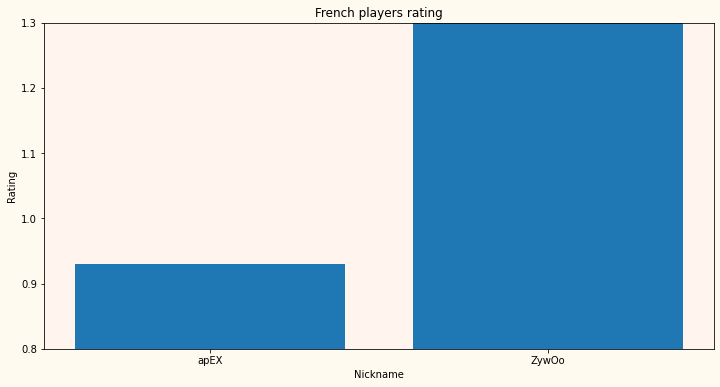

In [16]:
fig, ax = plt.subplots()
ax.bar(stat_fr["Nick"], stat_fr["Rating"])
ax.set_title("French players rating")
ax.set_xlabel("Nickname")
ax.set_ylabel("Rating")
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor("floralwhite")
ax.set_facecolor("seashell")
plt.ylim(0.8, 1.3)
plt.show()


Далі зробимо кругову діаграму, що показуватиме розподіл гравців за національностями (для цього спочатку порахуємо кількість гравців певної країни за допомогою групування)

In [17]:
count_nation = main_stat.groupby("Country")["Nick"].count().reset_index(name="Count").sort_values\
(by="Count", ascending=False).reset_index(drop=True)
count_nation

,Country,Count
0,Denmark,23
1,Brazil,18
2,Russia,16
3,Poland,9
4,Ukraine,7
5,Sweden,6
6,Spain,6
7,Australia,6
8,Portugal,5
9,United States,4


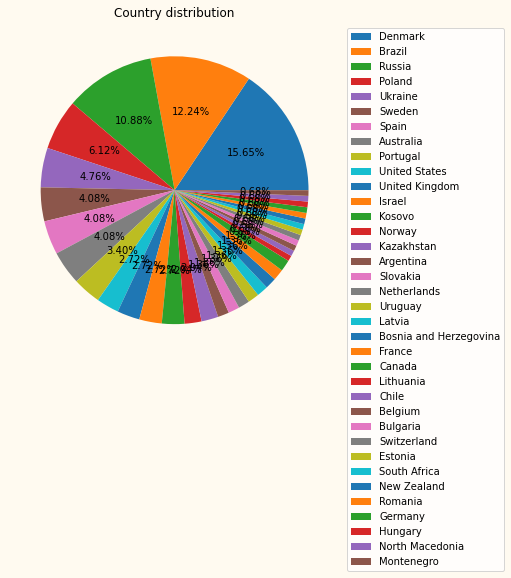

In [18]:
fig, ax = plt.subplots()
ax.pie(count_nation["Count"], autopct = "%1.2f%%")
ax.legend(count_nation["Country"], loc="upper left", bbox_to_anchor=(1.0,1.0))
ax.set_title("Country distribution")
fig.set_figheight(10)
fig.set_facecolor("floralwhite")
plt.show()


Наостанок, побудуємо інтерактивний графік залежності Impact від віку (Dataframe утворили вище)

In [19]:
def plotter(color, level):
    fig, ax = plt.subplots()
    ax.plot(age_stat["Age"], age_stat["Impact"])
    ax.axhline(y = level, color = color)
    ax.set_xlabel("Age")
    ax.set_ylabel("Impact")
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor("floralwhite")
    ax.set_facecolor("floralwhite")
    plt.show()
    
w.interact(plotter, color = ["red", "green", "black"], level = (0.9, 1.15, 0.01))

interactive(children=(Dropdown(description='color', options=('red', 'green', 'black'), value='red'), FloatSlid…

<function __main__.plotter(color, level)>